In [4]:
import numpy as np
import json
import matplotlib.pyplot as plt
import pylab

from microfaune import audio, plot, labeling

# Compare first labeling with audio annotator

## Florent

Number of bird songs labelised: 11
Proportion of bird songs during extract: 81.0 %


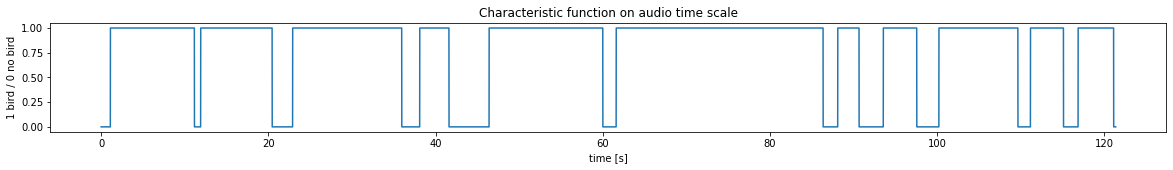

In [2]:
json_file_path = "C:/Users/Camille/Documents/MicroFaune/audio-annotator/compare_json_labels/test_labeling_labeled-florent.json"
wav_file_path = "C:/Users/Camille/Documents/MicroFaune/audio-annotator/static/wav/test_labeling.wav"

print("Number of bird songs labelised: " + str(labeling.number_labels(json_file_path)) )
print("Proportion of bird songs during extract: " + str(labeling.prop_labeled(json_file_path, wav_file_path)*100) + " %" )
plot.plot_charac_audio(json_file_path, wav_file_path)

## Hadrien

Number of bird songs labelised: 21
Proportion of bird songs during extract: 64.0 %


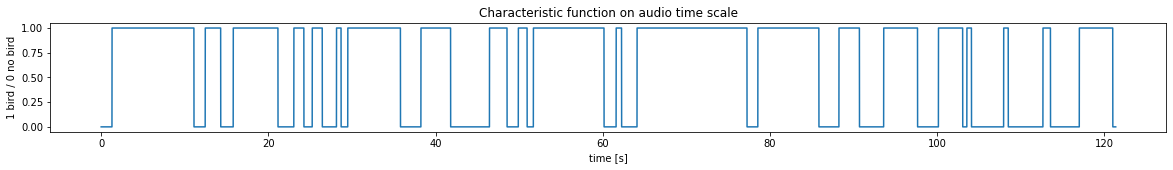

In [3]:
json_file_path = "C:/Users/Camille/Documents/MicroFaune/audio-annotator/compare_json_labels/test_labeling_labeled-hadrien.json"
wav_file_path = "C:/Users/Camille/Documents/MicroFaune/audio-annotator/static/wav/test_labeling.wav"

print("Number of bird songs labelised: " + str(labeling.number_labels(json_file_path)) )
print("Proportion of bird songs during extract: " + str(labeling.prop_labeled(json_file_path, wav_file_path)*100) + " %" )
plot.plot_charac_audio(json_file_path, wav_file_path)

## Camille

Number of bird songs labelised: 26
Proportion of bird songs during extract: 56.99999999999999 %


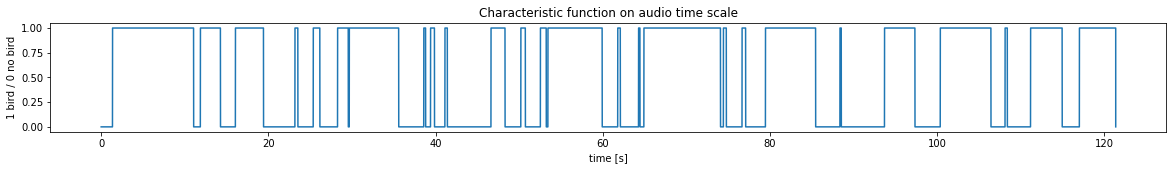

In [4]:
json_file_path = "C:/Users/Camille/Documents/MicroFaune/audio-annotator/compare_json_labels/test_labeling_labeled-camille.json"
wav_file_path = "C:/Users/Camille/Documents/MicroFaune/audio-annotator/static/wav/test_labeling.wav"

print("Number of bird songs labelised: " + str(labeling.number_labels(json_file_path)) )
print("Proportion of bird songs during extract: " + str(labeling.prop_labeled(json_file_path, wav_file_path)*100) + " %" )
plot.plot_charac_audio(json_file_path, wav_file_path)

## Louis

Number of bird songs labelised: 18
Proportion of bird songs during extract: 75.0 %


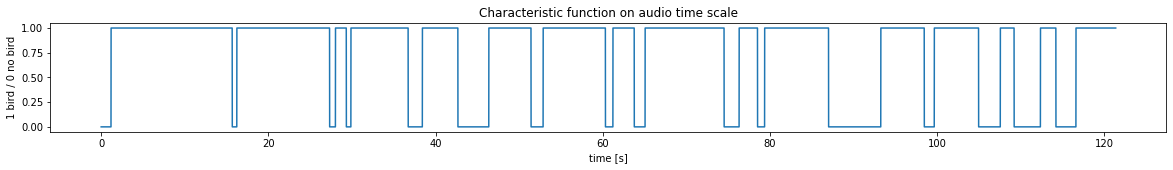

In [5]:
json_file_path = "C:/Users/Camille/Documents/MicroFaune/audio-annotator/compare_json_labels/test_labeling_labeled-louis.json"
wav_file_path = "C:/Users/Camille/Documents/MicroFaune/audio-annotator/static/wav/test_labeling.wav"

print("Number of bird songs labelised: " + str(labeling.number_labels(json_file_path)) )
print("Proportion of bird songs during extract: " + str(labeling.prop_labeled(json_file_path, wav_file_path)*100) + " %" )
plot.plot_charac_audio(json_file_path, wav_file_path)

## Ysé

NB: Only half of audio file labelised
Number of bird songs labelised: 14
Proportion of bird songs during extract: 33.0 %


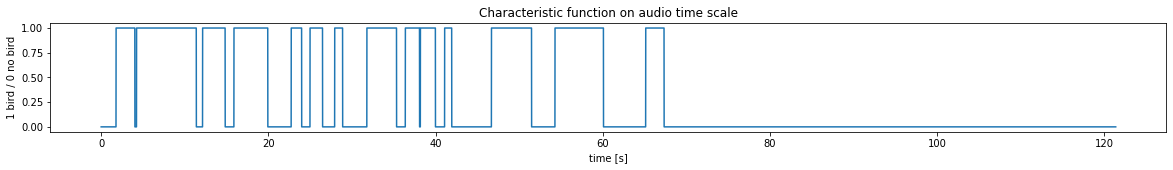

In [6]:
json_file_path = "C:/Users/Camille/Documents/MicroFaune/audio-annotator/compare_json_labels/test_labeling_labeled-yse.json"
wav_file_path = "C:/Users/Camille/Documents/MicroFaune/audio-annotator/static/wav/test_labeling.wav"

print('NB: Only half of audio file labelised')
print("Number of bird songs labelised: " + str(labeling.number_labels(json_file_path)) )
print("Proportion of bird songs during extract: " + str(labeling.prop_labeled(json_file_path, wav_file_path)*100) + " %" )
plot.plot_charac_audio(json_file_path, wav_file_path)

# Compute characteristic functions on audio and spectrogram time scale

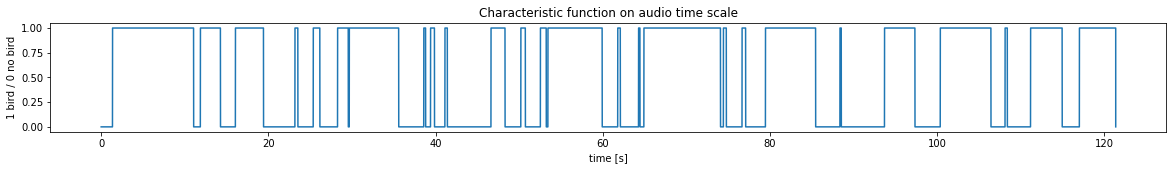

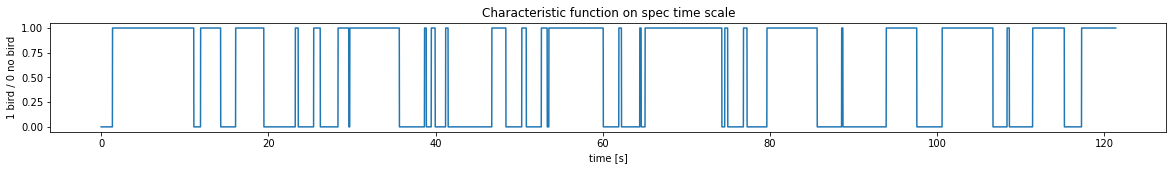

In [7]:
json_file_path = "C:/Users/Camille/Documents/MicroFaune/Git/labeling/test_labeling.json"
wav_file_path = "C:/Users/Camille/Documents/MicroFaune/Git/labeling/test_labeling.wav"

window_length = 0.020
overlap = 0.55

# Characteristic functions on audio time scale
charac_func_audio = labeling.charac_function_audio(json_file_path, wav_file_path)
plot.plot_charac_audio(json_file_path, wav_file_path)

# Characteristic functions on spectrogram time scale
charac_func_spec = labeling.charac_function_spec(wav_file_path,window_length, overlap, charac_func_audio)
plot.plot_charac_spec(wav_file_path, window_length, overlap, charac_func_audio)

In [8]:
#check length
[spec, t, f, x_fs] = audio.file2spec(wav_file_path, scale_spec="linear", window_length=window_length, overlap=overlap)
print(len(t))
print(len(charac_func_spec))

#check proportion
labeled_audio=np.where(charac_func_audio>0)
print(len(labeled_audio[0])/len(charac_func_audio))
labeled_spec=np.where(charac_func_spec>0)
print(len(labeled_spec[0])/len(charac_func_spec))

13485
13485
0.5674447813701579
0.5667037449017427


# Labeling with Audacity

In [9]:
def convert_label_audacity_csv(file_path):

    file = open(file_path, 'r')
    lines_list = file.read()
    lines_list = lines_list.split('\n')
    lines_list = lines_list[::2]
    lines_list = lines_list[:-1]
    
    start_points = [round(float(line.split('\t')[0]), 2) for line in lines_list]
    end_points = [round(float(line.split('\t')[1]), 2) for line in lines_list]
    
    tab = np.array((start_points, end_points)).transpose()
    np.savetxt(file_path[:-4]+'.csv', tab, delimiter=";")
    
    return None


def convert_label_audacity_json(csv_file, json_file):
    
    data = np.genfromtxt(csv_file, delimiter=";")
    shape_data = np.shape(data)
    start_time = data[:,0]
    end_time = data[:,1]
    
    data_dict = []
    
    for i in range(shape_data[0]):
        data_dict.append({
            'id': 'wavesurfer_' + str(i), 
            'start': start_time[i], 
            'end': end_time[i],
            'annotation': 'bird'
        })
    
    with open(json_file, 'w') as outfile:
        json.dump(data_dict, outfile)
    
    return None

In [10]:
txt_file = "C:/Users/Camille/Documents/MicroFaune/Git/labeling/test_audacity/test_labeling.txt"
convert_label_audacity_csv(txt_file)

csv_file = txt_file[:-4]+'.csv'
json_file = "C:/Users/Camille/Documents/MicroFaune/Git/labeling/test_labeling.json"
convert_label_audacity_json(csv_file, json_file)